### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Презентация сделки

In [2]:
# Перечень сделок и операций, отраженных на балансе, с привязкой к подразделению, продукту, клиенту 
#+ характеристики сделки, отражающие ее денежный поток
df_sdelka_id = pd.read_excel('CF_deals.xlsx', 'Deals_id')
df_sdelka_id

,ID сделки,"Признак включения сделки в расчет (1-включать, 0 - не включать)",Тип сделки,Тип контрагента,Контрагент/ Портфель,ЦФО,Валюта операции,Дата начала,Дата окончания,Спред к базовой ставке/ Купон/ Норма амортизации/ Норма дивидендов,...,Схема выплат процентов,Схема выплат комиссий,Схема начисления процентов/резервов/переоценки/амортизации,Чувствительность к изменению процентных ставок,Уровень санкционированности,Операция/ портфель,Рейтинг контрагента,Признак дефолта/реструктуризации,Дата дефолта/реструктуризации,LGD
0,ук1_2017,1,Уставный капитал и фонды,Наш банк,Акционеры банка,Корпоративное управление,RUR,2017-12-20,NaT,NaN,...,БезПр,БезКом,БезРез,БезПр,Действующая сделка,Операция,12.0,Стандартная,NaT,NaN
1,ос1_2017,0,Основные средства и НМА,Здания и сооружения,Акционеры банка,Корпоративное управление,RUR,2017-12-24,NaT,0.050,...,БезПр,БезКом,Ежег,БезПр,Действующая сделка,Операция,12.0,Стандартная,NaT,NaN
2,тцб1_2017,0,Вложения в ценные бумаги и прочие финансовые а...,Органы власти РФ,25083RMFS,Инвестиционный блок,RUR,2017-12-24,NaT,0.050,...,Ежег,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,4.0,Стандартная,NaT,NaN
3,cбк1_2018,0,Субординированный займ,Наш банк,Акционер банка 1,Корпоративное управление,RUR,2018-06-30,2023-06-30,0.045,...,Ежег,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,12.0,Стандартная,NaT,NaN
4,мбкпр1_2018,0,Средства банков,Банки-резиденты,Банк Авангард,Казначейство,RUR,2018-03-31,2018-06-30,0.035,...,КонСр,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,5.0,Стандартная,NaT,NaN
5,мбкпр2_2018,0,Средства банков,Банки-резиденты,Банк Авангард,Казначейство,RUR,2018-12-31,2019-01-31,0.040,...,КонСр,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,5.0,Стандартная,NaT,NaN
6,мбкр1_2018,0,"Ссуды и средства, размещенные в банках",Банки-резиденты,Сбербанк,Казначейство,RUR,2018-06-30,2018-09-30,0.030,...,КонСр,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,4.0,Стандартная,NaT,1.0
7,мбкр2_2018,0,"Ссуды и средства, размещенные в банках",Банки-резиденты,Сбербанк,Казначейство,RUR,2018-09-30,2018-12-31,0.035,...,КонСр,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,4.0,Стандартная,NaT,1.0
8,кк1_2017,0,"Ссуды и средства, предоставленные клиентам",Корпоративные клиенты-резиденты,ОАО Газпром,Корпоративный блок,RUR,2017-12-24,2020-12-24,0.065,...,Ежекв,БезКом,Ежем,ФиксСт,Действующая сделка,Операция,4.0,Стандартная,NaT,0.8
9,рсчкк1_2017,0,Счета клиентов до востребования,Корпоративные клиенты-резиденты,Рублевые счета юр.лиц резидентов 1,Корпоративный блок,RUR,2017-12-24,NaT,0.000,...,Ежем,БезКом,Ежем,БезПр,Действующая сделка,Портфель операций,12.0,Стандартная,NaT,NaN


In [3]:
df_sdelka_id.rename(columns = {'ID сделки':'id_sd', 
                               'Тип сделки':'type_sd',
                               'Тип контрагента':'type_counterparty',
                               'ЦФО':'resp_unit',
                               'Контрагент/ Портфель':'counterparty',
                               'Валюта операции':'cur_sd',
                               'Дата начала':'data_begin',
                               'Дата окончания':'data_end',
                               'Схема обслуживания сделки':'scheme_sd',
                               'Чувствительность к изменению процентных ставок':'sensitivity_rate',
                               'Уровень санкционированности':'level_authorization',
                               'Серия, транш, № выпуска для Цен. бум.':'id_sec',
                               'Номинал бумаги (в валюте номинала)':'par_val_sec_cur',
                               'Стоимость приобретения (в% от номинала)':'quotation_cost_sec',
                               'НКД уплаченный в валюте операции':'acc_coupon_yield_paid'}, inplace = True)

In [4]:
df_sdelka_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 26 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   id_sd                                                               23 non-null     object        
 1   Признак включения сделки в расчет (1-включать, 0 - не включать)     23 non-null     int64         
 2   type_sd                                                             23 non-null     object        
 3   type_counterparty                                                   23 non-null     object        
 4   counterparty                                                        23 non-null     object        
 5   resp_unit                                                           23 non-null     object        
 6   cur_sd                                                      

In [5]:
# Характеристики сделки, определяющие ее денежный поток и отражение на балансе
df_sdelka_cf = pd.read_excel('df_sdelka_cf_2.xlsx')

In [6]:
df_sdelka_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_sd                 166 non-null    object        
 1   course                166 non-null    float64       
 2   rating                166 non-null    int64         
 3   PD                    166 non-null    float64       
 4   LGD                   166 non-null    int64         
 5   defflg                166 non-null    int64         
 6   int_rate              166 non-null    float64       
 7   com_income_rate       166 non-null    int64         
 8   com_expense_rate      166 non-null    int64         
 9   par_val_sec           166 non-null    int64         
 10  market_rate           166 non-null    int64         
 11  change_numb_sec       166 non-null    int64         
 12  numb_sec              166 non-null    int64         
 13  change_acc_cur      

In [7]:
'''df_sdelka_cf.rename(columns = {'Уникальный код сделки':'id_sd', 
                               'Дата очередного изменения':'data',
                               'Курс руб./единица вал.опер.':'course',
                               'Процентная ставка/ Купон/ Норма амортизации':'int_rate',
                               'Ставка комиссии к получению':'com_income_rate',
                               'Ставка комиссии к уплате':'com_expense_rate',
                               'Номинал ценной бумаги':'par_value',
                               'Рыночная котировка актива':'market_rate',
                               'Изменение числа бумаг (для цен.бум.)':'change_numb_sec',
                               'Число бумаг (для цен.бум.)':'numb_sec',
                               'Изменение остатка по счету в валюте операции за период':'change_acc_cur',
                               'Остаток по счету в валюте операции на дату':'acc_cur',
                               'Изменение остатка по счету в руб. за период':'change_acc_rub',
                               'Остаток по счету в руб. на дату':'acc_rub',
                               'Наращенные проценты за период (в валюте операции)':'accrued_int_cur',
                               'Наращенные проценты за период (в руб.)':'accrued_int_rub',
                               'Проценты за период (в валюте операции)':'int_cur',
                               'Проценты за период (в руб.)':'int_rub',
                               'Комиссии полученные за период (в валюте операции)':'com_income_cur',
                               'Комиссии полученные за период (в руб.)':'com_income_rub',
                               'Комиссии уплаченные за период (в валюте операции)':'com_expense_cur',
                               'Комиссии уплаченные за период (в руб.)':'com_expense_rub',
                               'Норма резервирования по РСБУ/ Ставка ФОР':'res_rate_RSBU',
                               'Размер резерва по РСБУ на дату (в валюте операции)':'res_accrued_RSBU_cur',
                               'Размер резерва по РСБУ на дату (в руб.)':'res_accrued_RSBU_rub',
                               'Норма оценочного резерва':'res_rate_IFRS',
                               'Размер ОЦ на дату (в валюте операции)':'res_accrued_IFRS_cur',
                               'Размер ОЦ на дату (в руб.)':'res_accrued_IFRS_rub',
                               'Размер положительной переоценки по СС на дату (в вал.операции)':'gain_cur',
                               'Размер положительной переоценки по СС на дату (в руб.)':'gain_rub',
                               'Размер отрицательной переоценкипо СС на дату (в вал.операции)':'loss_cur',
                               'Размер отрицательной переоценкипо СС на дату (в руб.)':'loss_rub'}, inplace = True)'''

"df_sdelka_cf.rename(columns = {'Уникальный код сделки':'id_sd', \n                               'Дата очередного изменения':'data',\n                               'Курс руб./единица вал.опер.':'course',\n                               'Процентная ставка/ Купон/ Норма амортизации':'int_rate',\n                               'Ставка комиссии к получению':'com_income_rate',\n                               'Ставка комиссии к уплате':'com_expense_rate',\n                               'Номинал ценной бумаги':'par_value',\n                               'Рыночная котировка актива':'market_rate',\n                               'Изменение числа бумаг (для цен.бум.)':'change_numb_sec',\n                               'Число бумаг (для цен.бум.)':'numb_sec',\n                               'Изменение остатка по счету в валюте операции за период':'change_acc_cur',\n                               'Остаток по счету в валюте операции на дату':'acc_cur',\n                               'Изменение

In [8]:
df_sdelka_cf['data']=pd.to_datetime(df_sdelka_cf['data'])

In [9]:
df_sdelka_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_sd                 166 non-null    object        
 1   course                166 non-null    float64       
 2   rating                166 non-null    int64         
 3   PD                    166 non-null    float64       
 4   LGD                   166 non-null    int64         
 5   defflg                166 non-null    int64         
 6   int_rate              166 non-null    float64       
 7   com_income_rate       166 non-null    int64         
 8   com_expense_rate      166 non-null    int64         
 9   par_val_sec           166 non-null    int64         
 10  market_rate           166 non-null    int64         
 11  change_numb_sec       166 non-null    int64         
 12  numb_sec              166 non-null    int64         
 13  change_acc_cur      

### Презентация сделки

ук1_2017


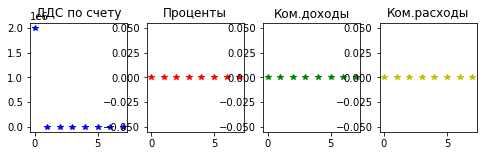

ос1_2017


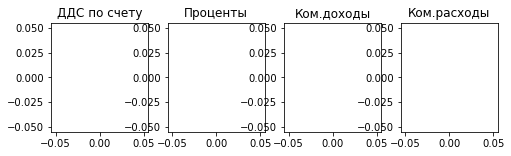

тцб1_2017


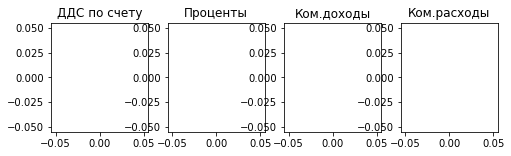

cбк1_2018


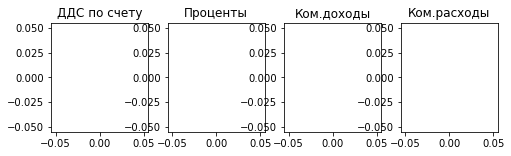

мбкпр1_2018


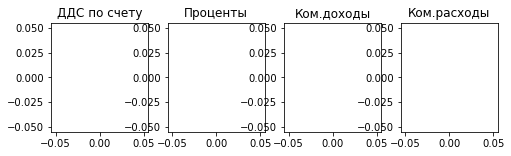

мбкпр2_2018


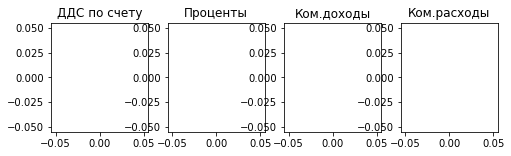

мбкр1_2018


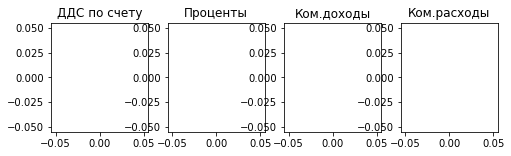

мбкр2_2018


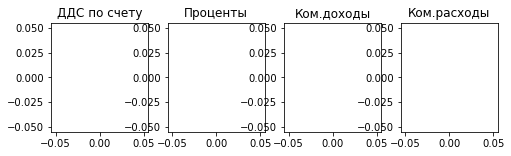

кк1_2017


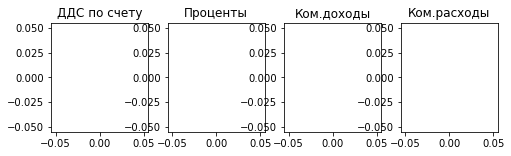

рсчкк1_2017


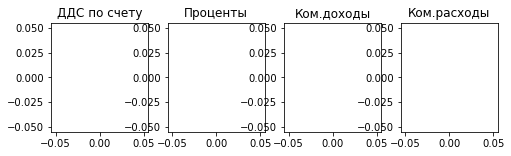

кк1_2019


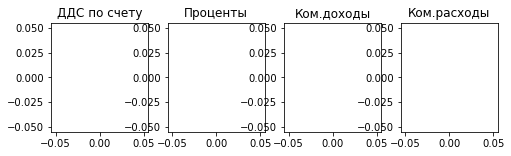

кк1_2018


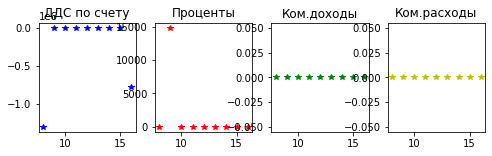

кк2_2018


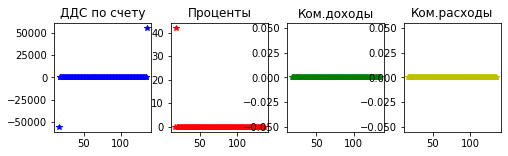

кк3_2018


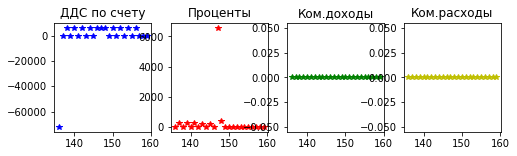

кк4_2018


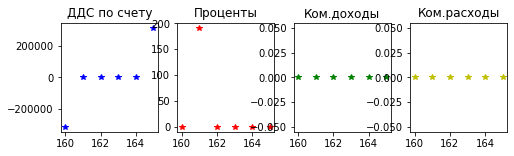

кк5_2018


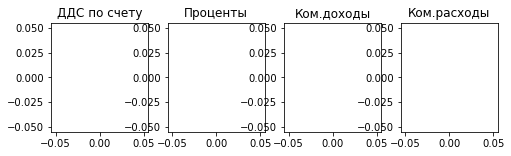

кк6_2018


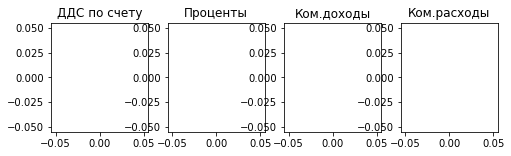

км1_2018


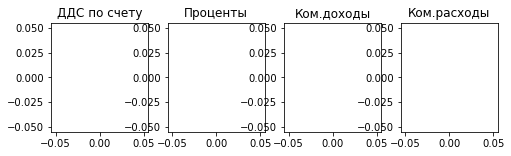

кч1_2018


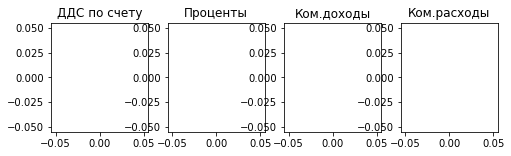

рсчфл1_2018


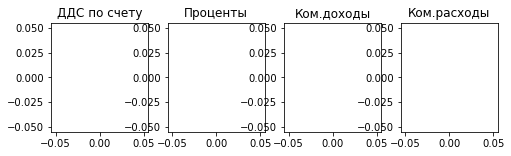

кч2_2018


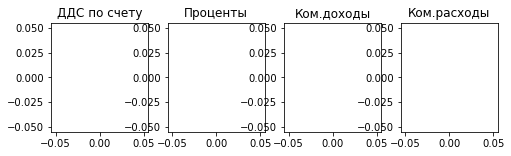

рсчфл2_2018


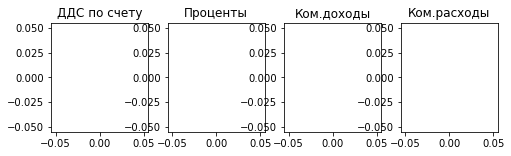

зпл_2017


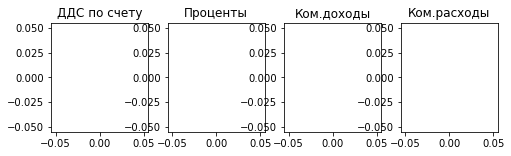

In [10]:
titles=['ДДС по счету','Проценты','Ком.доходы','Ком.расходы']
col_names=['change_acc_cur','int_cur','com_income_cur','com_expense_cur']
marks=['b*','r*','g*','y*']
for row in df_sdelka_id['id_sd']:
    print(row)
    df1=df_sdelka_cf[df_sdelka_cf['id_sd']==row]
    fig = plt.figure(figsize=(8,2))
    cols = 4
    for i in range(0,4):
        ax = fig.add_subplot(1, cols, i+1)
        ax.set_title(titles[i])
        plt.plot(df1[col_names[i]],marks[i])
    plt.show()

### Отражение сделок в CF

In [13]:
#Формат для расчета CF
df_cf = pd.read_excel('CF_deals.xlsx','CF ')
df_cf

,Код,АКТИВЫ
0,C001,"Ссуды и средства, размещенные в банках (Ностр..."
1,C001004,Банки-резиденты
2,C0010041,Входящие потоки
3,C0010042,Исходящие потоки
4,C0010043,Процентные доходы
...,...,...
556,C02403301,Исходящие потоки по коммунальным расходам
557,C024034,Исходящие потоки по представительским расходам
558,C02403401,Исходящие потоки по представительским расходам
559,C024035,Исходящие потоки по прочим административно-...


In [14]:
df_cf.rename(columns = {'Код':'cod_sd', 
                               'АКТИВЫ':'assets'}, inplace = True)

In [15]:
df_cf=df_cf.set_index('cod_sd')

In [16]:
df_cf

,assets
cod_sd,
C001,"Ссуды и средства, размещенные в банках (Ностр..."
C001004,Банки-резиденты
C0010041,Входящие потоки
C0010042,Исходящие потоки
C0010043,Процентные доходы
...,...
C02403301,Исходящие потоки по коммунальным расходам
C024034,Исходящие потоки по представительским расходам
C02403401,Исходящие потоки по представительским расходам


In [17]:
#Ввод даты начала, глубины и шага прогноза
date_beg = (input('Введите дату начала прогноза в формате DD/MM/YYYY: '))
date_begin = pd.to_datetime(date_beg)
date_gap = str(input('Введите шаг прогноза в формате: ND/NM/NY '))
n_int = int(input('Введите число периодов прогноза: '))

data_backets = pd.date_range(date_beg, periods = n_int, freq = date_gap)
print(data_backets)

Введите дату начала прогноза в формате DD/MM/YYYY: 2019/01/01
Введите шаг прогноза в формате: ND/NM/NY 1M
Введите число периодов прогноза: 12
DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')


In [18]:
def Trans (x):
    return(x.days)

In [19]:
df_sdelka_cf['gap_to_date_begin']=df_sdelka_cf['data']-date_begin
df_sdelka_cf.head()

,id_sd,course,rating,PD,LGD,defflg,int_rate,com_income_rate,com_expense_rate,par_val_sec,...,traide_inc_cur,traide_inc_rub,traide_loss_cur,traide_loss_rub,other_op_inc_cur,other_op_inc_rub,other_op_exp_cur,other_op_exp_cur.1,data,gap_to_date_begin
0,ук1_2017,1.0,12,0.407195,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,2017-12-20,-377 days
1,ук1_2017,1.0,12,0.407195,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,2017-12-31,-366 days
2,ук1_2017,1.0,12,0.407195,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,2018-12-31,-1 days
3,ук1_2017,1.0,12,0.407195,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,2019-12-31,364 days
4,ук1_2017,1.0,12,0.407195,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,2020-12-31,730 days


In [20]:
df_sdelka_cf['gap_to_date_begin'] = df_sdelka_cf['gap_to_date_begin'].apply(Trans)

In [21]:
#корзины и названия столбцов для прогноза CF

print('Число интервалов прогноза', n_int)
db=str(date_begin.day) + '.' + str(date_begin.month) + '.' + str(date_begin.year)
time_int=['до '+db,db]
backet_cf=[-1,0]
for i in range(0,n_int):
    backet_cf.append(i+1)
    if i==0:
        gr1=db+'-'+str(data_backets[i].day) + '.' + str(data_backets[i].month) + '.' + str(data_backets[i].year)
    else:
        gr1=(str(data_backets[i-1].day) + '.' + str(data_backets[i-1].month) + '.' + str(data_backets[i-1].year) + '-' 
            + str(data_backets[i].day) + '.' + str(data_backets[i].month) + '.' + str(data_backets[i].year))
    time_int.append(gr1)
backet_cf.append(n_int+1)
gr1='после '+ str(data_backets[n_int-1].day) + '.' + str(data_backets[n_int-1].month) + '.' + str(data_backets[n_int-1].year)
time_int.append(gr1)
print(len(time_int),time_int)
print(len(backet_cf),backet_cf)

Число интервалов прогноза 12
15 ['до 1.1.2019', '1.1.2019', '1.1.2019-31.1.2019', '31.1.2019-28.2.2019', '28.2.2019-31.3.2019', '31.3.2019-30.4.2019', '30.4.2019-31.5.2019', '31.5.2019-30.6.2019', '30.6.2019-31.7.2019', '31.7.2019-31.8.2019', '31.8.2019-30.9.2019', '30.9.2019-31.10.2019', '31.10.2019-30.11.2019', '30.11.2019-31.12.2019', 'после 31.12.2019']
15 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [22]:
# Добавление столбцов под корзины CF
for i in range(0,n_int+3):
    df_cf[time_int[i]]=0
df_cf.columns

Index(['assets', 'до 1.1.2019', '1.1.2019', '1.1.2019-31.1.2019',
       '31.1.2019-28.2.2019', '28.2.2019-31.3.2019', '31.3.2019-30.4.2019',
       '30.4.2019-31.5.2019', '31.5.2019-30.6.2019', '30.6.2019-31.7.2019',
       '31.7.2019-31.8.2019', '31.8.2019-30.9.2019', '30.9.2019-31.10.2019',
       '31.10.2019-30.11.2019', '30.11.2019-31.12.2019', 'после 31.12.2019'],
      dtype='object')

In [23]:
df_cf.index

Index([     'C001',   'C001004',  'C0010041',  'C0010042',  'C0010043',
        'C0010044',  'C0010045',   'C001005',  'C0010051',  'C0010052',
       ...
         'C024031', 'C02403101',   'C024032', 'C02403201',   'C024033',
       'C02403301',   'C024034', 'C02403401',   'C024035', 'C02403501'],
      dtype='object', name='cod_sd', length=561)

In [24]:
def Backets (data_sd):
    if data_sd<date_begin:
        nback = time_int[0]
    elif data_sd==date_begin:
        nback = time_int[1]
    elif data_sd>data_backets[n_int-1]:
        nback = time_int[n_int+2]
    else:
        for i in range(0,n_int):
            if data_sd <= data_backets[i]:
                nback = time_int[i+2]
                break
    return(nback)

In [25]:
df_sdelka_cf['backet'] = df_sdelka_cf['data'].apply(Backets)

In [26]:
df_sdelka_cf.backet.value_counts()

после 31.12.2019         117
до 1.1.2019               32
1.1.2019-31.1.2019         5
30.11.2019-31.12.2019      2
28.2.2019-31.3.2019        1
30.9.2019-31.10.2019       1
31.7.2019-31.8.2019        1
30.4.2019-31.5.2019        1
31.5.2019-30.6.2019        1
31.8.2019-30.9.2019        1
30.6.2019-31.7.2019        1
31.1.2019-28.2.2019        1
31.10.2019-30.11.2019      1
31.3.2019-30.4.2019        1
Name: backet, dtype: int64

In [74]:
def Cod_sd (x):
    if x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые через ПУ':
        c='C001'
    elif x == 'Ссуды и средства, размещенные в банках':
        c='C002'
    elif x == 'Ссуды и средства, предоставленные клиентам':
        c='C003'
    elif x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые через ПСД':
        c='C004'
    elif x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые по АС':
        c='C005'
    elif x == 'Основные средства, переданные в финансовый лизинг':
        c='C006'
    elif x == 'Инвестиции в дочерние компании':
        c='C007'
    elif x == 'Инвестиции в ассоциированные компании':
        c='C008'
    elif x == 'Прочие инвестиции':
        c='C009'
    elif x =='Основные средства и НМА':
        c='C010'
    elif x =='Прочие активы':
        c='C011'
    elif x =='Проблемные активы':
        c='C012'
    elif x =='Средства банков':
        c='C013'
    elif x =='Счета клиентов до востребования':
        c='C014'
    elif x =='Срочные депозиты клиентов':
        c='C015'
    elif x =='Векселя':
        c='C016'
    elif x =='Облигации':
        c='C017'
    elif x == 'Депозитные сертификаты':
        c='C018'
    elif x == 'Сберегательные сертификаты':
        c='C019'
    elif x == 'Субординированный займ':
        c='C020'
    elif x == 'Прочие пассивы':
        c='C021'
    elif x == 'Уставный капитал и фонды':
        c='C022'
    elif x == 'Обязательства по налогам':
        c='C023'
    elif x == 'Административно-хозяйственные расходы':
        c='C024'
    elif x == 'Нераспределенная прибыль прошлых лет, фонды и эмиссионные разницы':
        c='C025'  
    else:
        c='неверный тип операции'
    return(c)

In [75]:
df_sdelka_id['cod_type_sd'] = df_sdelka_id['type_sd'].apply(Cod_sd)

In [76]:
def Cod_co (x):
    if x == 'Органы власти РФ':
        c='001'
    elif x == 'Муниципальные и местные органы власти РФ':
        c='002'
    elif x == 'Органы власти иностранных государств':
        c='003'
    elif x == 'Банки-резиденты':
        c='004'
    elif x == 'Банки-нерезиденты':
        c='005'
    elif x == 'Корпоративные клиенты-резиденты':
        c='006'
    elif x == 'Корпоративные клиенты-нерезиденты':
        c='007'
    elif x == 'Субъекты малого предпринимательства':
        c='008'
    elif x == 'Частные лица-резиденты':
        c='009'
    elif x =='Частные лица-нерезиденты':
        c='010'
    elif x =='Здания и сооружения':
        c='011'
    elif x =='Транспортные средства':
        c='012'
    elif x =='Компьютеры':
        c='013'
    elif x =='Мебель и прочее оборудование':
        c='014'
    elif x =='Нематериальные активы':
        c='015'
    elif x =='Прочее имущество':
        c='016'
    elif x =='Наш банк':
        c='017'
    elif x == 'Расчеты по налогу на прибыль':
        c='018'
    elif x == 'Расчеты по налогу на ценные бумаги':
        c='019'
    elif x == 'Расчеты по прочим налогам':
        c='020'
    elif x == 'Чистый процентный доход':
        c='021'
    elif x == 'Чистый торговый доход':
        c='022'
    elif x == 'Чистый комиссионный доход':
        c='023'
    elif x == 'Прочие операционные доходы/расходы':
        c='024'
    elif x == 'Административно-хозяйственные расходы':
        c='025'
    elif x == 'Расходы по налогам':
        c='026'
    else:
        c='неверный тип контрагента/вида расчетов'
    return(c)

In [77]:
df_sdelka_id['cod_type_co'] = df_sdelka_id['type_counterparty'].apply(Cod_co)

In [78]:
df_sdelka_id['cod_cf']=df_sdelka_id['cod_type_sd']+df_sdelka_id['cod_type_co']

In [79]:
df_sdelka_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   id_sd                                                               23 non-null     object        
 1   Признак включения сделки в расчет (1-включать, 0 - не включать)     23 non-null     int64         
 2   type_sd                                                             23 non-null     object        
 3   type_counterparty                                                   23 non-null     object        
 4   counterparty                                                        23 non-null     object        
 5   resp_unit                                                           23 non-null     object        
 6   cur_sd                                                      

In [80]:
df_sdelka_cf['cod_cf'] = ''
for row in df_sdelka_id.iterrows():
    cod=row[1][0]
    a=row[1][28]
    print(cod,a)
    indx = df_sdelka_cf[df_sdelka_cf['id_sd']==cod].index
    df_sdelka_cf.loc[indx, 'cod_cf'] = a

ук1_2017 C022017
ос1_2017 C010011
тцб1_2017 C001001
cбк1_2018 C020017
мбкпр1_2018 C013004
мбкпр2_2018 C013004
мбкр1_2018 C002004
мбкр2_2018 C002004
кк1_2017 C003006
рсчкк1_2017 C014006
кк1_2019 C003006
кк1_2018 C003006
кк2_2018 C003006
кк3_2018 C003006
кк4_2018 C003006
кк5_2018 C003006
кк6_2018 C003006
км1_2018 C003008
кч1_2018 C003009
рсчфл1_2018 C014009
кч2_2018 C003009
рсчфл2_2018 C014009
зпл_2017 неверный тип операцииневерный тип контрагента/вида расчетов


In [81]:
df_sdelka_cf.cod_cf.value_counts()

C003006    158
C022017      8
Name: cod_cf, dtype: int64

In [82]:
df_sdelka_cf['input_cf']=df_sdelka_cf.change_acc_rub[df_sdelka_cf['change_acc_rub']>=0]
df_sdelka_cf['output_cf']=df_sdelka_cf.change_acc_rub[df_sdelka_cf['change_acc_rub']<0]

In [83]:
#группировка по кодам сделок и корзинам CF
group = df_sdelka_cf.groupby(['cod_cf','backet'])
# входящий поток по счетам требований/обязательств
df_input_acc=group.input_cf.sum().unstack()
df_input_acc=df_input_acc.fillna(0)
indold=df_input_acc.index.tolist()
indnew=['']*len(indold)
newindex={}
for i in range(0,len(indold)):
    indnew[i]=indold[i]+'1'
    newindex[indold[i]]=indnew[i]
df_input_acc=df_input_acc.rename(index = newindex)
df_input_acc

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
cod_cf,,,,,,,,,,,,,,
C0030061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0220171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# исходящий поток по счетам требований/обязательств
df_output_acc=group.output_cf.sum().unstack()
df_output_acc=df_output_acc.fillna(0)
indold=df_output_acc.index.tolist()
indnew=['']*len(indold)
newindex={}
for i in range(0,len(indold)):
    indnew[i]=indold[i]+'2'
    newindex[indold[i]]=indnew[i]
df_output_acc=df_output_acc.rename(index = newindex)
df_output_acc

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
cod_cf,,,,,,,,,,,,,,
C0030062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0220172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#поток по процентам
df_interest = group.int_rub.sum().unstack()
df_interest=df_interest.fillna(0)
indold=df_interest.index.tolist()
indnew=['']*len(indold)
newindex={}
for i in range(0,len(indold)):
    indnew[i]=indold[i]+'3'
    newindex[indold[i]]=indnew[i]
df_interest=df_interest.rename(index = newindex)
df_interest

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
cod_cf,,,,,,,,,,,,,,
C0030063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18822.793378,6994.849315
C0220173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [86]:
#поток по комиссиям полученным
df_com_income = group.com_income_rub.sum().unstack()
df_com_income=df_com_income.fillna(0)
indold=df_com_income.index.tolist()
indnew=['']*len(indold)
newindex={}
for i in range(0,len(indold)):
    indnew[i]=indold[i]+'4'
    newindex[indold[i]]=indnew[i]
df_com_income=df_com_income.rename(index = newindex)
df_com_income

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
cod_cf,,,,,,,,,,,,,,
C0030064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0220174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#поток по комиссиям уплаченным
df_com_expense = group.com_expense_rub.sum().unstack()
df_com_expense=df_com_expense.fillna(0)
indold=df_com_expense.index.tolist()
indnew=['']*len(indold)
newindex={}
for i in range(0,len(indold)):
    indnew[i]=indold[i]+'5'
    newindex[indold[i]]=indnew[i]
df_com_expense=df_com_expense.rename(index = newindex)
df_com_expense

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
cod_cf,,,,,,,,,,,,,,
C0030065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0220175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
tables = [df_input_acc, df_output_acc, df_interest, df_com_income, df_com_expense]
df = pd.DataFrame([], columns=df_input_acc.columns).fillna(0)
for tab in tables:
    row = pd.DataFrame([], index=tab.index, columns=df.columns).fillna(0)
    for ind in tab.index:
        for col in tab.columns:
            row.loc[ind, col] += tab.loc[ind, col]
    df = df.append(row)
df

backet,1.1.2019-31.1.2019,28.2.2019-31.3.2019,30.11.2019-31.12.2019,30.4.2019-31.5.2019,30.6.2019-31.7.2019,30.9.2019-31.10.2019,31.1.2019-28.2.2019,31.10.2019-30.11.2019,31.3.2019-30.4.2019,31.5.2019-30.6.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,до 1.1.2019,после 31.12.2019
C0030061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0220171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0030062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0220172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0030063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18822.793378,6994.849315
C0220173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0030064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0220174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0030065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
C0220175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [89]:
#CF в разрезе видов потоков
ind_df_cf = df_input_acc.index.tolist()
col_df_cf = df_input_acc.columns.tolist()
for row in ind_df_cf:
    for col in col_df_cf:
        df_cf.loc[row,col] = df_input_acc.loc[row,col]
df_cf

,assets,до 1.1.2019,1.1.2019,1.1.2019-31.1.2019,31.1.2019-28.2.2019,28.2.2019-31.3.2019,31.3.2019-30.4.2019,30.4.2019-31.5.2019,31.5.2019-30.6.2019,30.6.2019-31.7.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,30.9.2019-31.10.2019,31.10.2019-30.11.2019,30.11.2019-31.12.2019,после 31.12.2019
cod_sd,,,,,,,,,,,,,,,,
C001,"Ссуды и средства, размещенные в банках (Ностр...",0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C001004,Банки-резиденты,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0010041,Входящие потоки,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0010042,Исходящие потоки,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0010043,Процентные доходы,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C02403301,Исходящие потоки по коммунальным расходам,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C024034,Исходящие потоки по представительским расходам,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C02403401,Исходящие потоки по представительским расходам,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Совокупный CF
df_cf_it=df_cf.drop(['assets'], axis=1)
df_cf_it.tail()

,до 1.1.2019,1.1.2019,1.1.2019-31.1.2019,31.1.2019-28.2.2019,28.2.2019-31.3.2019,31.3.2019-30.4.2019,30.4.2019-31.5.2019,31.5.2019-30.6.2019,30.6.2019-31.7.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,30.9.2019-31.10.2019,31.10.2019-30.11.2019,30.11.2019-31.12.2019,после 31.12.2019
cod_sd,,,,,,,,,,,,,,,
C02403301,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C024034,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C02403401,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C024035,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C02403501,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df_cf_it=df_cf_it.append(df_cf_it.sum(axis=0), ignore_index=True)
cf_itog = df_cf_it.tail(1)
cf_itog

,до 1.1.2019,1.1.2019,1.1.2019-31.1.2019,31.1.2019-28.2.2019,28.2.2019-31.3.2019,31.3.2019-30.4.2019,30.4.2019-31.5.2019,31.5.2019-30.6.2019,30.6.2019-31.7.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,30.9.2019-31.10.2019,31.10.2019-30.11.2019,30.11.2019-31.12.2019,после 31.12.2019
561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
cf_itog=cf_itog.rename(index = {561:'itog'})
cf_itog.loc['cum_itog']=[0]*len(time_int)
cf_itog

,до 1.1.2019,1.1.2019,1.1.2019-31.1.2019,31.1.2019-28.2.2019,28.2.2019-31.3.2019,31.3.2019-30.4.2019,30.4.2019-31.5.2019,31.5.2019-30.6.2019,30.6.2019-31.7.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,30.9.2019-31.10.2019,31.10.2019-30.11.2019,30.11.2019-31.12.2019,после 31.12.2019
itog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cum_itog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
cf_itog.loc['cum_itog',time_int[0]]=cf_itog.loc['itog',time_int[0]]
for i in range(1,len(time_int)):
    cf_itog.loc['cum_itog',time_int[i]]=cf_itog.loc['cum_itog',time_int[i-1]]+cf_itog.loc['itog',time_int[i]]

In [94]:
cf_itog

,до 1.1.2019,1.1.2019,1.1.2019-31.1.2019,31.1.2019-28.2.2019,28.2.2019-31.3.2019,31.3.2019-30.4.2019,30.4.2019-31.5.2019,31.5.2019-30.6.2019,30.6.2019-31.7.2019,31.7.2019-31.8.2019,31.8.2019-30.9.2019,30.9.2019-31.10.2019,31.10.2019-30.11.2019,30.11.2019-31.12.2019,после 31.12.2019
itog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cum_itog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
res1=cf_itog.iloc[1]
res1

до 1.1.2019              0.0
1.1.2019                 0.0
1.1.2019-31.1.2019       0.0
31.1.2019-28.2.2019      0.0
28.2.2019-31.3.2019      0.0
31.3.2019-30.4.2019      0.0
30.4.2019-31.5.2019      0.0
31.5.2019-30.6.2019      0.0
30.6.2019-31.7.2019      0.0
31.7.2019-31.8.2019      0.0
31.8.2019-30.9.2019      0.0
30.9.2019-31.10.2019     0.0
31.10.2019-30.11.2019    0.0
30.11.2019-31.12.2019    0.0
после 31.12.2019         0.0
Name: cum_itog, dtype: float64

In [96]:
result = res1.transpose()
result

до 1.1.2019              0.0
1.1.2019                 0.0
1.1.2019-31.1.2019       0.0
31.1.2019-28.2.2019      0.0
28.2.2019-31.3.2019      0.0
31.3.2019-30.4.2019      0.0
30.4.2019-31.5.2019      0.0
31.5.2019-30.6.2019      0.0
30.6.2019-31.7.2019      0.0
31.7.2019-31.8.2019      0.0
31.8.2019-30.9.2019      0.0
30.9.2019-31.10.2019     0.0
31.10.2019-30.11.2019    0.0
30.11.2019-31.12.2019    0.0
после 31.12.2019         0.0
Name: cum_itog, dtype: float64

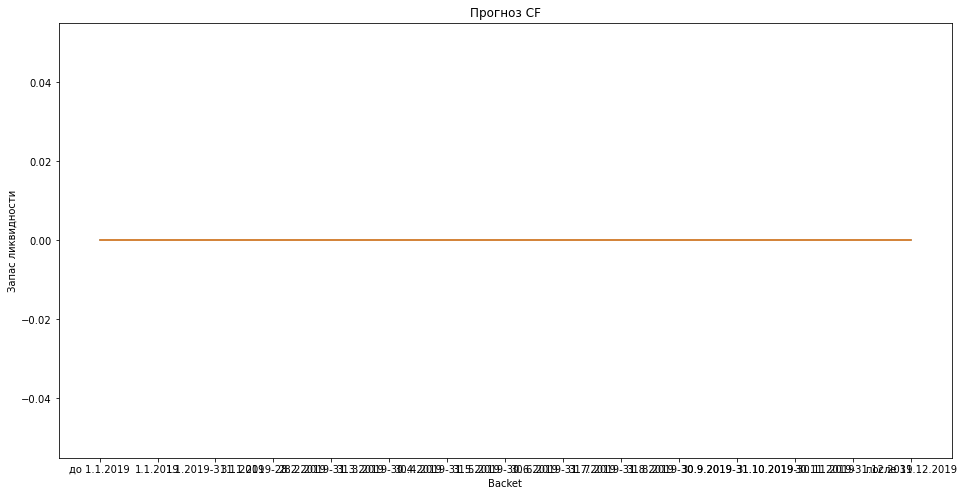

In [97]:
result = cf_itog.transpose()
fig = plt.figure(figsize=(16,8))
plt.title("Прогноз CF") 
plt.xlabel("Backet")
plt.ylabel("Запас ликвидности")
plt.plot(result.index,result)

### Отражение сделок в балансе

In [ ]:
#Балансовые остатки


### Расчет прогноза ликвидности на основе  CF

### Прогноз ОПУ на основе ОПУ на начало периода и CF за период

### Прогноз баланса на основе баланса на начало периода и CF за период

### Оценка риска и его отдельных компонентов на основе прогноза CF 